In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sys

In [2]:
pwd

'/Users/munkhtsatsralbatdelger/Downloads/DATA Projects/DATA-400'

In [3]:
# Generate the training data set
df_lac_training = pd.read_csv('Liberal Arts College/df_lac_stu_diversity_training.csv')

In [4]:
df_lac_training.head()

,ipeds_id,uni_name,state,school_year,ranking,hbcu,pct_retention,stu_faculty_ratio,beg_endowment,end_endowment,...,gradrate_asia,gradrate_bkaa,gradrate_hisp,gradrate_nhpi,gradrate_whit,gradrate_2mor,gradrate_unkn,gradrate_intl,pct_female_prof_salary,pct_male_prof_salary
0,100937.0,Birmingham Southern College,AL,2013-2014,124,0.0,80.0,13.0,50042970.0,53921439.0,...,2.9289,5.0209,0.8368,0.0,89.1213,1.2552,0.4184,0.0,0.36277,0.63723
1,100937.0,Birmingham Southern College,AL,2013-2014,124,0.0,80.0,13.0,50042970.0,53921439.0,...,2.9289,5.0209,0.8368,0.0,89.1213,1.2552,0.4184,0.0,0.36277,0.63723
2,100937.0,Birmingham Southern College,AL,2013-2014,124,0.0,80.0,13.0,50042970.0,53921439.0,...,2.9289,5.0209,0.8368,0.0,89.1213,1.2552,0.4184,0.0,0.36277,0.63723
3,100937.0,Birmingham Southern College,AL,2013-2014,124,0.0,80.0,13.0,50042970.0,53921439.0,...,2.9289,5.0209,0.8368,0.0,89.1213,1.2552,0.4184,0.0,0.36277,0.63723
4,100937.0,Birmingham Southern College,AL,2013-2014,124,0.0,80.0,13.0,50042970.0,53921439.0,...,2.9289,5.0209,0.8368,0.0,89.1213,1.2552,0.4184,0.0,0.36277,0.63723


In [5]:
# Generate the test data set
# 2021-2022 AS TEST SET
df_lac_test = pd.read_csv('Liberal Arts College/df_lac_stu_diversity_test.csv')

In [6]:
# Import df
df_lac = pd.read_csv('Liberal Arts College/df_lac_final.csv')

In [7]:
# I. Summary Statistics for Top Universities Based on 2025 Best National University Rankings

In [72]:
# Top 5 Universities Based on 2025 Best Liberal Arts College Rankings + Dickinson
df_top_uni = df_lac[df_lac['uni_name'].isin(['Williams College',
                                           'Amherst College',
                                           'Amherst College',
                                           'Bowdoin College',
                                           'Pomona College',
                                           'Dickinson College'])]

/var/folders/bc/cq3wb6t53dzfk32y587l32kw0000gn/T/ipykernel_49661/3315760040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_uni.loc[:, 'year_start'] = df_lac['school_year'].str.split('-').str[0].astype(int)


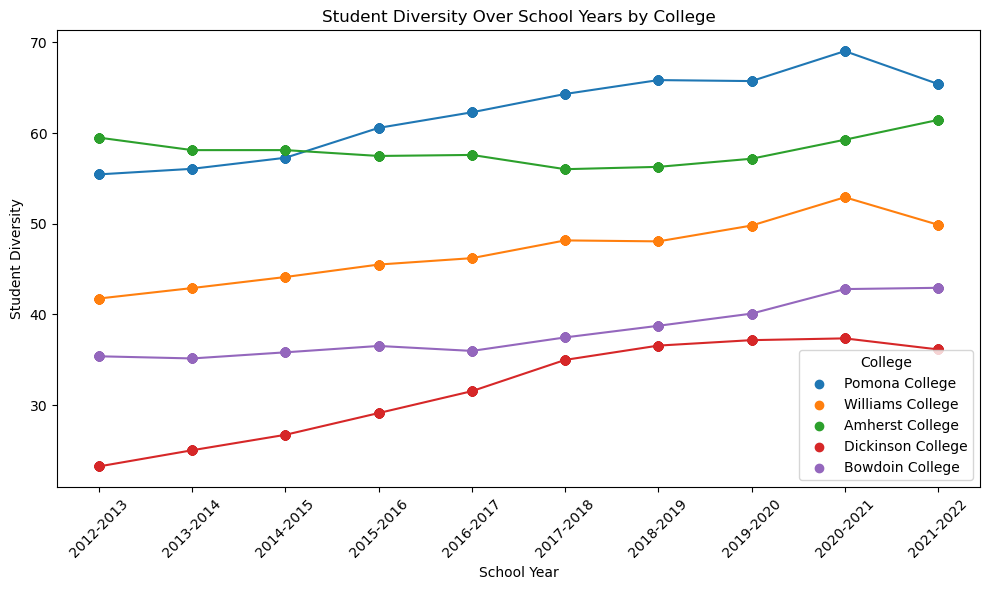

In [73]:
# Extract the starting year to sort
df_top_uni.loc[:, 'year_start'] = df_lac['school_year'].str.split('-').str[0].astype(int)

# Sort the data by starting year
df_top_uni = df_top_uni.sort_values('year_start')

# Plot
plt.figure(figsize=(10, 6))
for uni in df_top_uni['uni_name'].unique():
    uni_data = df_top_uni[df_top_uni['uni_name'] == uni]
    plt.scatter(uni_data['school_year'], uni_data['stu_diversity'], label=uni)
    plt.plot(uni_data['school_year'], uni_data['stu_diversity'])

plt.xlabel('School Year')
plt.ylabel('Student Diversity')
plt.title('Student Diversity Over School Years by College')
plt.legend(title='College')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure as a PNG file with higher DPI
plt.savefig(f'Top 5 Colleges Based on 2025 Best Liberal Arts College Rankings (Student Diversity).png', format='png', dpi=300)

plt.show()

In [10]:
# II. Machine Learning Model
## Dependent Variable: stu_diversity

In [11]:
## A. The Training Set

In [12]:
# Create Pandas Dataframe
y_train = pd.DataFrame()
X_train = pd.DataFrame()

# Prepare the training set features
X_train = pd.get_dummies(df_lac_training['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary']

for var in dict_var:
    X_train[var] = df_lac_training[var]

# Target variable
y_train = df_lac_training['stu_diversity']

# Add constant to the training set
X_train = sm.add_constant(X_train)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          stu_diversity   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3323.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:31:02   Log-Likelihood:            -1.9830e+05
No. Observations:               57174   AIC:                         3.967e+05
Df Residuals:                   57126   BIC:                         3.971e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2567

In [13]:
# Redirect the summary output to a file
with open('model_summary_stu_diversity.txt', 'w') as f:
    # Capture the output and write it to the file
    sys.stdout = f
    print(model.summary())
    sys.stdout = sys.__stdout__  # Reset redirect

Mean Squared Error (MSE): 0.6162589479700316
Mean Absolute Error (MAE): 0.7829205415551025
[  1.  44.  84. 127. 166.]
Mean Squared Error (MSE): 136.40265889578816
Mean Absolute Error (MAE): 9.367612352741979
Mean Squared Error (MSE): 64.60893129915111
Mean Absolute Error (MAE): 6.345684880417132
Mean Squared Error (MSE): 93.11060563800979
Mean Absolute Error (MAE): 7.724616550966698
Mean Squared Error (MSE): 125.39549199916823
Mean Absolute Error (MAE): 8.765943806232046


In [14]:
## B. The Test Set

In [15]:
# Create Pandas Dataframe
y_test = pd.DataFrame()
X_test = pd.DataFrame()

X_test = pd.get_dummies(df_lac_test['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary', 'uni_name']

for var in dict_var:
    X_test[var] = df_lac_test[var]
    
X_test = sm.add_constant(X_test)

In [16]:
### Predict the stu_diversity in 2021-2022 for Dickinson College

In [17]:
# Filter the school name
X_test = X_test[X_test['uni_name']=='Dickinson College']

X_test.drop('uni_name', axis=1, inplace=True)

In [18]:
# Target variable
y_test = df_lac_test[['stu_diversity', 'uni_name']]

# Filter the school name
y_test = y_test[y_test['uni_name']=='Dickinson College']

# Drop unnecessary column
y_test = y_test.drop('uni_name', axis=1)

In [19]:
# Predict the value
y_pred = model.predict(X_test)

In [20]:
# Filter the school name
df_harvard_test = df_lac_test[df_lac_test['uni_name']=='Dickinson College']

In [21]:
# Compare the actual and predicted values
df_concat = pd.concat([df_harvard_test, y_pred], axis=1)

In [22]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# View df
df_concat.head()

,ipeds_id,uni_name,state,school_year,ranking,hbcu,pct_retention,stu_faculty_ratio,beg_endowment,end_endowment,stu_financial_aid,stu_diversity,prof_diversity,major,prop_major,pct_female_stu,pct_male_stu,pct_aian_stu,pct_asia_stu,pct_bkaa_stu,pct_hisp_stu,pct_nhpi_stu,pct_whit_stu,pct_2mor_stu,pct_unkn_stu,pct_intl_stu,pct_female_prof,pct_male_prof,pct_aian_prof,pct_asia_prof,pct_bkaa_prof,pct_hisp_prof,pct_nhpi_prof,pct_whit_prof,pct_2mor_prof,pct_unkn_prof,pct_intl_prof,gradrate_female,gradrate_male,gradrate_aian,gradrate_asia,gradrate_bkaa,gradrate_hisp,gradrate_nhpi,gradrate_whit,gradrate_2mor,gradrate_unkn,gradrate_intl,pct_female_prof_salary,pct_male_prof_salary,0
5007,212009.0,Dickinson College,PA,2021-2022,47,0.0,92.0,9.0,600038947.0,583477014.0,2173.0,36.1446,23.7443,11.0701,1.5625,58.1883,41.8117,0.0892,4.5515,5.2655,8.166,0.0,63.8554,4.1053,0.9817,12.9853,52.968,47.032,0.4566,5.0228,3.653,5.9361,0.0,76.2557,0.9132,0.9132,6.8493,60.4895,39.5105,0.0,3.8462,3.4965,7.5175,0.0,68.7063,3.8462,0.8741,11.7133,0.494567,0.505433,36.923295
5008,212009.0,Dickinson College,PA,2021-2022,47,0.0,92.0,9.0,600038947.0,583477014.0,2173.0,36.1446,23.7443,13.0901,1.9531,58.1883,41.8117,0.0892,4.5515,5.2655,8.166,0.0,63.8554,4.1053,0.9817,12.9853,52.968,47.032,0.4566,5.0228,3.653,5.9361,0.0,76.2557,0.9132,0.9132,6.8493,60.4895,39.5105,0.0,3.8462,3.4965,7.5175,0.0,68.7063,3.8462,0.8741,11.7133,0.494567,0.505433,36.926464
5009,212009.0,Dickinson College,PA,2021-2022,47,0.0,92.0,9.0,600038947.0,583477014.0,2173.0,36.1446,23.7443,16.0301,0.2344,58.1883,41.8117,0.0892,4.5515,5.2655,8.166,0.0,63.8554,4.1053,0.9817,12.9853,52.968,47.032,0.4566,5.0228,3.653,5.9361,0.0,76.2557,0.9132,0.9132,6.8493,60.4895,39.5105,0.0,3.8462,3.4965,7.5175,0.0,68.7063,3.8462,0.8741,11.7133,0.494567,0.505433,36.912518
5010,212009.0,Dickinson College,PA,2021-2022,47,0.0,92.0,9.0,600038947.0,583477014.0,2173.0,36.1446,23.7443,16.0302,0.0000,58.1883,41.8117,0.0892,4.5515,5.2655,8.166,0.0,63.8554,4.1053,0.9817,12.9853,52.968,47.032,0.4566,5.0228,3.653,5.9361,0.0,76.2557,0.9132,0.9132,6.8493,60.4895,39.5105,0.0,3.8462,3.4965,7.5175,0.0,68.7063,3.8462,0.8741,11.7133,0.494567,0.505433,36.910616
5011,212009.0,Dickinson College,PA,2021-2022,47,0.0,92.0,9.0,600038947.0,583477014.0,2173.0,36.1446,23.7443,16.0402,0.5469,58.1883,41.8117,0.0892,4.5515,5.2655,8.166,0.0,63.8554,4.1053,0.9817,12.9853,52.968,47.032,0.4566,5.0228,3.653,5.9361,0.0,76.2557,0.9132,0.9132,6.8493,60.4895,39.5105,0.0,3.8462,3.4965,7.5175,0.0,68.7063,3.8462,0.8741,11.7133,0.494567,0.505433,36.915054


In [23]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

In [24]:
mean_squared_error(y_test, y_pred)

0.6162589479700316

In [25]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

In [26]:
mean_absolute_error(y_test, y_pred)

0.7829205415551025

In [27]:
# III. Calculate MSE Sorted by University Ranking Percentile

In [28]:
# Create df_ranking dataframe
df_ranking = pd.DataFrame()
df_ranking = df_lac_test.copy() # Remove the duplicates
df_ranking_test = df_lac_test.copy()

In [29]:
# Drop duplicates
df_ranking = df_ranking.drop_duplicates(subset=['uni_name', 'ranking'], keep='last')

In [30]:
# Keep necessary columns
df_ranking = df_ranking[['uni_name', 'ranking']]

In [31]:
# Define the percentiles
percentiles = [0, 25, 50, 75, 100]

# Calculate the percentiles
ranking_percentiles = np.percentile(df_ranking['ranking'], percentiles)

# Print the percentile values
print(ranking_percentiles)

In [32]:
# Define the percentile ranges
percentile_bins = [ranking_percentiles[0], ranking_percentiles[1], ranking_percentiles[2], ranking_percentiles[3], ranking_percentiles[4]]
percentile_labels = ['0th-25th', '25th-50th', '50th-75th', '75th-100th']

# Use pandas.cut() to categorize each university based on their ranking
df_ranking['ranking_percentile'] = pd.cut(df_ranking['ranking'], bins=percentile_bins, labels=percentile_labels, include_lowest=True)

# Use pandas.cut() to categorize each university based on their ranking
df_ranking_test['ranking_percentile'] = pd.cut(df_ranking_test['ranking'], bins=percentile_bins, labels=percentile_labels, include_lowest=True)

# View df
df_ranking[['uni_name', 'ranking', 'ranking_percentile']].sort_values('ranking')

,uni_name,ranking,ranking_percentile
2779,Williams College,1,0th-25th
2334,Amherst College,2,0th-25th
5740,Swarthmore College,3,0th-25th
2686,Wellesley College,4,0th-25th
319,Pomona College,4,0th-25th
2135,Bowdoin College,6,0th-25th
145,Claremont McKenna College,6,0th-25th
6802,Washington and Lee University,9,0th-25th
3026,Carleton College,9,0th-25th
6351,Middlebury College,9,0th-25th


In [33]:
## A. 0th-25th percentile: Top-performing universities

In [34]:
# Create Pandas Dataframe
y_test_top = pd.DataFrame()
X_test_top = pd.DataFrame()

X_test_top = pd.get_dummies(df_ranking_test['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary', 'ranking_percentile']

for var in dict_var:
    X_test_top[var] = df_ranking_test[var]
    
X_test_top = sm.add_constant(X_test_top)

In [35]:
# Filter the top universities
X_test_top = X_test_top[X_test_top['ranking_percentile']=='0th-25th']

# Drop unnecessary column
X_test_top = X_test_top.drop('ranking_percentile', axis=1)


In [36]:
# Target variable
y_test_top = df_ranking_test[['stu_diversity', 'ranking_percentile']]

# Filter the school name
y_test_top = y_test_top[y_test_top['ranking_percentile']=='0th-25th']

# Drop unnecessary column
y_test_top = y_test_top.drop('ranking_percentile', axis=1)

In [37]:
# Predict the value
y_pred_top = model.predict(X_test_top)

In [38]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_top, y_pred_top))

In [39]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_top, y_pred_top))

In [40]:
## B. 25th-50th percentile: High-performing universities, but not at the top

In [41]:
# Create Pandas Dataframe
y_test_high = pd.DataFrame()
X_test_high = pd.DataFrame()

X_test_high = pd.get_dummies(df_ranking_test['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary', 'ranking_percentile']

for var in dict_var:
    X_test_high[var] = df_ranking_test[var]
    
X_test_high = sm.add_constant(X_test_high)

In [42]:
# Filter the top universities
X_test_high = X_test_high[X_test_high['ranking_percentile']=='25th-50th']

# Drop unnecessary column
X_test_high = X_test_high.drop('ranking_percentile', axis=1)

In [43]:
# Target variable
y_test_high = df_ranking_test[['stu_diversity', 'ranking_percentile']]

# Filter the school name
y_test_high = y_test_high[y_test_high['ranking_percentile']=='25th-50th']

# Drop unnecessary column
y_test_high = y_test_high.drop('ranking_percentile', axis=1)

In [44]:
# Predict the value
y_pred_high = model.predict(X_test_high)

In [45]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_high, y_pred_high))

In [46]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_high, y_pred_high))

In [47]:
## C. 50th-75th percentile: Mid-range universities


In [48]:
# Create Pandas Dataframe
y_test_mid = pd.DataFrame()
X_test_mid = pd.DataFrame()

X_test_mid = pd.get_dummies(df_ranking_test['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary', 'ranking_percentile']

for var in dict_var:
    X_test_mid[var] = df_ranking_test[var]
    
X_test_mid = sm.add_constant(X_test_mid)

In [49]:
# Filter the top universities
X_test_mid = X_test_mid[X_test_mid['ranking_percentile']=='50th-75th']

# Drop unnecessary column
X_test_mid = X_test_mid.drop('ranking_percentile', axis=1)

In [50]:
# Target variable
y_test_mid = df_ranking_test[['stu_diversity', 'ranking_percentile']]

# Filter the school name
y_test_mid = y_test_mid[y_test_mid['ranking_percentile']=='50th-75th']

# Drop unnecessary column
y_test_mid = y_test_mid.drop('ranking_percentile', axis=1)

In [51]:
# Predict the value
y_pred_mid = model.predict(X_test_mid)

In [52]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_mid, y_pred_mid))

In [53]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_mid, y_pred_mid))

In [54]:
## D. 75th-100th percentile: Lower-performing universities relative to the dataset

In [55]:
# Create Pandas Dataframe
y_test_low = pd.DataFrame()
X_test_low = pd.DataFrame()

X_test_low = pd.get_dummies(df_ranking_test['state'], drop_first=True)

# Add other variables
dict_var = ['ranking', 'hbcu', 'pct_retention', 'stu_faculty_ratio', 
              'beg_endowment', 'stu_financial_aid', 'prof_diversity', 'prop_major', 
              'pct_female_stu', 'pct_male_stu', 'gradrate_female', 'gradrate_male', 
              'pct_female_prof_salary', 'pct_male_prof_salary', 'ranking_percentile']

for var in dict_var:
    X_test_low[var] = df_ranking_test[var]
    
X_test_low = sm.add_constant(X_test_low)

In [56]:
# Filter the top universities
X_test_low = X_test_low[X_test_low['ranking_percentile']=='75th-100th']

# Drop unnecessary column
X_test_low = X_test_low.drop('ranking_percentile', axis=1)

In [57]:
# Target variable
y_test_low = df_ranking_test[['stu_diversity', 'ranking_percentile']]

# Filter the school name
y_test_low = y_test_low[y_test_low['ranking_percentile']=='75th-100th']

# Drop unnecessary column
y_test_low = y_test_low.drop('ranking_percentile', axis=1)

In [58]:
# Predict the value
y_pred_low = model.predict(X_test_low)

In [59]:
# Calculate MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test_low, y_pred_low))

In [60]:
# Calculate the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_low, y_pred_low))

In [61]:
## Visualizations

In [62]:
# View df
df_ranking = df_ranking[['uni_name', 'ranking', 'ranking_percentile']].sort_values('ranking')
df_ranking

,uni_name,ranking,ranking_percentile
2779,Williams College,1,0th-25th
2334,Amherst College,2,0th-25th
5740,Swarthmore College,3,0th-25th
2686,Wellesley College,4,0th-25th
319,Pomona College,4,0th-25th
2135,Bowdoin College,6,0th-25th
145,Claremont McKenna College,6,0th-25th
6802,Washington and Lee University,9,0th-25th
3026,Carleton College,9,0th-25th
6351,Middlebury College,9,0th-25th


In [63]:
df_ranking_top = df_ranking[df_ranking['ranking_percentile']=='0th-25th'].head()

In [64]:
df_ranking_high = df_ranking[df_ranking['ranking_percentile']=='25th-50th'].head()

In [65]:
df_ranking_mid = df_ranking[df_ranking['ranking_percentile']=='50th-75th'].head()

In [66]:
df_ranking_low = df_ranking[df_ranking['ranking_percentile']=='75th-100th'].head()

In [67]:
# Create the Dataframe to display MSE and uni
df_mse = {}

df_mse = {
    'Top-performing universities': mean_squared_error(y_test_top, y_pred_top),
    'High-performing universities': mean_squared_error(y_test_high, y_pred_high),
    'Mid-range universities': mean_squared_error(y_test_mid, y_pred_mid),
    'Lower-performing universities': mean_squared_error(y_test_low, y_pred_low)
}

# Convert the dictionary to a DataFrame
df_mse = pd.DataFrame(list(df_mse.items()), columns=['uni_rank', 'MSE'])

# Matching
df_mse['ranking_percentile'] = np.select(
    [
        df_mse['uni_rank'] == 'Top-performing universities', 
        df_mse['uni_rank'] == 'High-performing universities', 
        df_mse['uni_rank'] == 'Mid-range universities', 
        df_mse['uni_rank'] == 'Lower-performing universities'
    ],
    ['0th-25th', '25th-50th', '50th-75th', '75th-100th'],
    default='Unknown'
)

# View df
df_mse

,uni_rank,MSE,ranking_percentile
0,Top-performing universities,136.402659,0th-25th
1,High-performing universities,64.608931,25th-50th
2,Mid-range universities,93.110606,50th-75th
3,Lower-performing universities,125.395492,75th-100th


In [68]:
# Concat df
df_nu_ranking = pd.concat([df_ranking_top, df_ranking_high])
df_nu_ranking = pd.concat([df_nu_ranking, df_ranking_mid])
df_nu_ranking = pd.concat([df_nu_ranking, df_ranking_low])
df_merged = pd.merge(df_nu_ranking, df_mse, on='ranking_percentile', how='left')

In [69]:
# Drop unncessary column
df_merged = df_merged.drop('ranking_percentile', axis=1)

# View df
df_merged

,uni_name,ranking,uni_rank,MSE
0,Williams College,1,Top-performing universities,136.402659
1,Amherst College,2,Top-performing universities,136.402659
2,Swarthmore College,3,Top-performing universities,136.402659
3,Wellesley College,4,Top-performing universities,136.402659
4,Pomona College,4,Top-performing universities,136.402659
5,The University of the South,47,High-performing universities,64.608931
6,DePauw University,47,High-performing universities,64.608931
7,Whitman College,47,High-performing universities,64.608931
8,Dickinson College,47,High-performing universities,64.608931
9,Connecticut College,51,High-performing universities,64.608931


In [70]:
# Export to excel
df_merged.to_excel('df_mse_percentile_stu_diversity.xlsx', index=False)

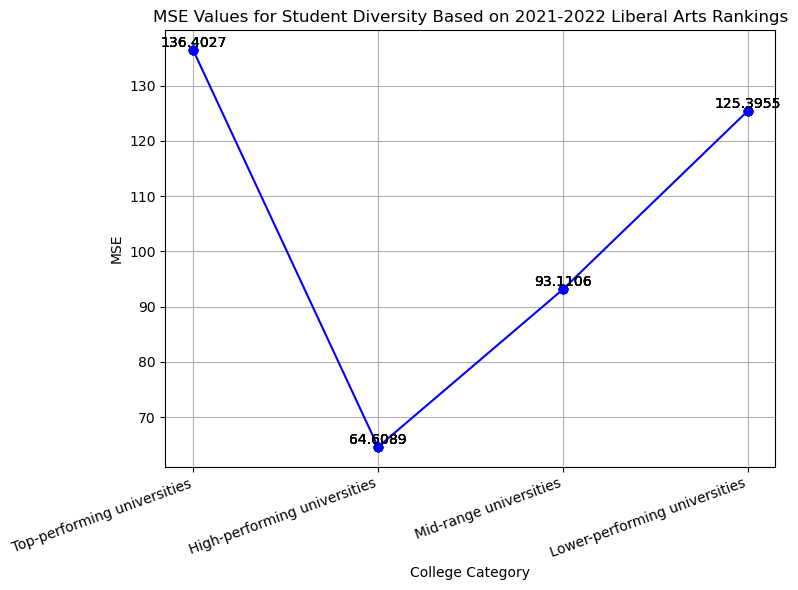

In [71]:
# Sort by MSE
df_sorted = df_merged.copy()

# Plotting the line chart with values displayed on the line
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['uni_rank'], df_sorted['MSE'], marker='o', linestyle='-', color='b')

# Annotating the values on the line
for i, mse in enumerate(df_sorted['MSE']):
    plt.text(df_sorted['uni_rank'].iloc[i], mse, f'{mse:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('MSE Values for Student Diversity Based on 2021-2022 Liberal Arts Rankings')
plt.xlabel('College Category')
plt.ylabel('MSE')
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.tight_layout()

# Save the figure as a PNG file with higher DPI
plt.savefig(f'MSE Values for Student Diversity Based on 2021-2022 Liberal Arts Rankings.png', format='png', dpi=300)

# Show the plot
plt.show()